<a href="https://colab.research.google.com/github/kbdev20/bigdata/blob/main/BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Szükséges intallálások

In [ ]:
!pip install pandas pyarrow

Adatok elérése

In [14]:
## Do some code here
# data: /content/drive/MyDrive/BigData/stop_times.txt
##      https://drive.google.com/file/d/1fAIfsmk0ZuyShny5tqdOgsF_m2Dj9JSU/view?usp=share_link
# csv_to_parquet.py
#!pip install geopandas
#!pip install contextily
import pandas as pd
import geopandas as gpd
import contextily as cx
import pyarrow as pa
import pyarrow.parquet as pq

data = "/content/drive/MyDrive/BigData/stop_times.txt"

print("hello bello")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
hello bello


Adatok beolvasása

In [5]:


csv_file = data
"""
parquet_file = '/content/drive/MyDrive/BigData/parquet.txt'
chunksize = 100_000

csv_stream = pd.read_csv(csv_file, sep='\t', chunksize=chunksize, low_memory=False)

for i, chunk in enumerate(csv_stream):
    print("Chunk", i)
    if i == 0:
        # Guess the schema of the CSV file from the first chunk
        parquet_schema = pa.Table.from_pandas(df=chunk).schema
        # Open a Parquet file for writing
        parquet_writer = pq.ParquetWriter(parquet_file, parquet_schema, compression='snappy')
    # Write CSV chunk to the parquet file
    table = pa.Table.from_pandas(chunk, schema=parquet_schema)
    parquet_writer.write_table(table)

parquet_writer.close()
"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


FileNotFoundError: ignored

Adatok DataFrame-be töltése

In [12]:
#df = pd.read_csv('/content/drive/MyDrive/BigData/stop_times.txt')
#df = pd.read_csv('stop_times.txt')
shapes_df = pd.read_csv('shapes.txt')
shapes_df.head
gdf = gpd.GeoDataFrame(shapes_df, geometry=gpd.points_from_xy(shapes_df['shape_pt_lon'], shapes_df['shape_pt_lat']))
gdf.head

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<bound method NDFrame.head of        shape_id  shape_pt_sequence  shape_pt_lat  shape_pt_lon  \
0           285             174374     47.519648     19.148326   
1           285             174375     47.519666     19.148313   
2           285             174376     47.519839     19.148638   
3           285             174377     47.520618     19.150320   
4           285             174378     47.520681     19.150426   
...         ...                ...           ...           ...   
580885   a-1228             264330     47.503879     19.140625   
580886   a-1228             264331     47.503861     19.140160   
580887   a-1228             264332     47.503818     19.139436   
580888   a-1228             264333     47.503534     19.137211   
580889   a-1228             264334     47.503585     19.137192   

        shape_dist_traveled                   geometry  
0                       0.0  POINT (19.14833 47.51965)  
1                       2.0  POINT (19.14831 47.51967)  
2     

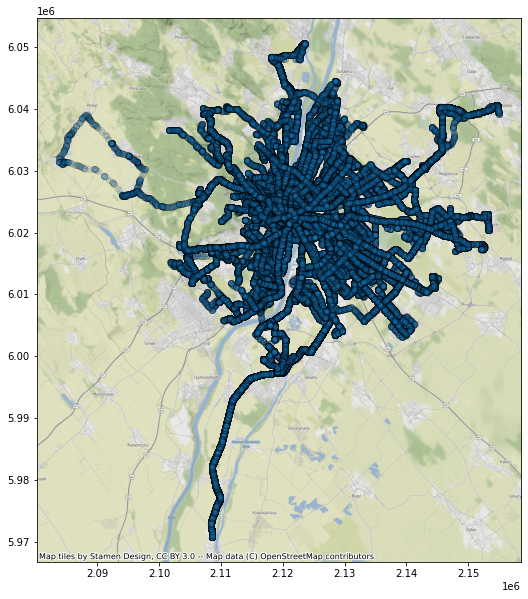

In [24]:
#plot

#A GTFS data. crs. The coordinate reference system represented as an EPSG code. The default value is 4326 (latlong WGS84).
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(10, 10), alpha=0.1, edgecolor='k')
cx.add_basemap(ax, zoom=12)


In [ ]:
for col in df.columns:
  print(col)


trip_id
stop_id
arrival_time
departure_time
stop_sequence
stop_headsign
pickup_type
drop_off_type
shape_dist_traveled


 
*   TODO: Adatelőkészítés és szűkítés: a cél mindenhol az, hogy "mikroadatokon" dolgozzunk, így ha adatszűkítésre van szükség, akkor javasolt nem mintavételezni, hanem szisztematikusan részadatkészletet választani. Az előkészítés része egy adatszótár létrehozása is (jó gyakorlat: https://help.osf.io/article/217-how-to-make-a-data-dictionary).
*   Cél: dokumentáljuk és értsük az adatkészlet változóit. 



Nem releváns adatok "kidobálása":


*   Azok az oszlopok amelyek nem kellenek a feladat szempontjából
*   Azok a sorok melyek nem felelnek meg a kritériumoknak





In [ ]:
df = df.drop(columns=[oszlopnevek felsorolva])